# Solução numérica das Equações Diferenciais Ordinárias (EDOs)
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufrgs.br

## Introdução

"Um modelo matemático frequentemente tem a forma de uma equação diferencial, isto é, uma equação que contém uma função desconhecida e algumas de suas derivadas. Isso não surpreende, porque em uma situação real normalmente notamos que mudanças ocorrem e queremos predizer o comportamento futuro com base na maneira como os valores presentes variam." ([Stewart et al., 2022](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/37)) 

A Figura abaixo ilustra dos modelos matemáticos para o crescimento populacional $P(t)$ em que $P$ é o número de inivíduos e $t$ é o tempo.  O primeiro modelo baseia-se na hipótese de que uma população cresce a uma taxa proporcional ao seu tamanho (razoável para uma população em condições ideais, ou seja, meio ambiente ilimitado, nutrição adequada, ausência de predadores e imunidade a doenças). O segundo modelo assume que a taxa de crescimento populacional é proporcional tanto à população quanto à diferença entre a capacidade de suporte $M$ e a população. A equação desse modelo é chamada *equação diferencial logística*.

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2004%20-%20EDOs%20de%201%C2%AA%20ordem,%20solu%C3%A7%C3%A3o%20e%20campo%20de%20dire%C3%A7%C3%B5es/imagens/crescimento_populacional.png?raw=true" width="500"/>

Figura 1 - Dois modelos matemáticos para o crescimento populacional.

As equações diferenciais são usadas para modelar sistemas em todos os campos da engenharia e da ciência, tais como o movimento de fluidos, o fluxo de corrente elétrica, a dissipação de calor, a propagação de ondas, etc ([Boyce e Diprima, 2024](https://integrada.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/26%5B%3Bvnd.vst.idref%3Dchapter01%5D!/4/12%5Bsec1-1%5D/3:29%5Bs%20B%2C%C3%A1si%5D)).

A ordem de uma equação diferencial é determinada pela mais alta ordem da derivada da função $y(x)$ presente na equação. As equações a seguir são exemplos de equações diferenciais ordinárias. Temos as seguintes notações usuais:

$$y'= \frac{dy}{dx}, \,\,\,  y''= \frac{d^2y}{dx^2}, \,\,\,... $$

Por exemplo:

$ \frac{dy}{dx} = 3x-1$ é uma EDO de ordem 1

$ y' = -xy$ é uma EDO de ordem 1

$ \frac{d^2y}{dx^2} = x^2-y+e^x$ é uma EDO de ordem 2 

$ y'' -4y' + 3y = x$ é uma EDO de ordem 2 

$ \frac{d^5y}{dx^5} + 3x\frac{dy}{dx}=2$ é uma EDO de ordem 5 


Resolver uma equação diferencial consiste em determinar uma função que satisfaça a equação. Em alguns casos, encontrar soluções exatas para certas equações diferenciais pode ser uma tarefa difícil ou até mesmo impossível. Nestes casos, a abordagem numérica é a alternativa para tornar essas equações úteis em projetos e estudo de fenômenos diversos. Métodos gráficos, como plotar um campo de direções, pode ser útil para avaliar o com portamento qualitativo das soluções de uma equação diferencial.

Por exemplo, é facil verificar que a solução geral da equação diferencial

$$
y^{\prime}=x^3
$$

é dada por

$$
y=\frac{x^4}{4}+C
$$

onde $C$ é uma constante qualquer.
Mas, em geral, resolver uma equação diferencial não é uma tarefa fácil. Não existe uma técnica sistemática que nos permita resolver todas as equações diferenciais. 

Neste outro exemplo, tem-se um pêndulo de comprimento $l$, com massa $m$ em sua extremidade, como ilustrado na figura abaixo. 

<img src="https://github.com/tiagoburiol/MatComp_III/blob/main/Notebook%2004%20-%20EDOs%20de%201%C2%AA%20ordem,%20solu%C3%A7%C3%A3o%20e%20campo%20de%20dire%C3%A7%C3%B5es/imagens/pendulo.png?raw=true" width="100"/>

Figura 2 - Pêndulo.

O ângulo que o pêndulo faz com o eixo vertical ao longo do tempo, $\theta (t)$ na presença de gravidade vertical $g$ pode ser descrito pela equação do pêndulo

$$
\frac{d^2\theta(t)}{dt^2} + \dfrac{g}{L} \, sen(\theta(t)).
$$

Essa é uma equação não linear de difícil solução. 

A estratégia usada para obter a solução é simplificar a equação assumindo que os ângulos são muito pequenos (ou seja, $sen\theta \approx \theta$), então a equação do pêndulo se reduz a

$$
\frac{d^2\theta(t)}{dt^2} = -\dfrac{g}{L}\theta(t).
$$


### 4.2 Campo de direções

"Muitos dos princípios, ou leis, que regem o comportamento do mundo físico são proposições, ou relações, envolvendo a taxa segundo a qual as coisas acontecem."([Boyce e Diprima, 2024](https://integrada.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/26%5B%3Bvnd.vst.idref%3Dchapter01%5D!/4/12%5Bsec1-1%5D/3:29%5Bs%20B%2C%C3%A1si%5D)) 

Em linguagem matemática, as relações são equações, e as taxas são derivadas. Em situações em que não é simples ou conveniente obter a solução explícita de uma EDO, é possível fazer deduções qualitativas sobre o comportamento das soluções a partir do desenho das taxas de variação (direções) em uma "grade" de pontos.

Veremos alguns exemplos a seguir.


**Exemplo 4.1:** ([Boyce e Diprima, 2024](https://integrada.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/26%5B%3Bvnd.vst.idref%3Dchapter01%5D!/4/16/3:168%5Blid%2Cos%5E%2C%5D))
 Considere um objeto em queda livre, na atmosfera, perto do nível do mar. 

A lei física que governa o movimento de objetos é a segunda lei de Newton, que diz que a massa do objeto multiplicada por sua aceleração é igual à força total atuando sobre o objeto, ou seja

$$F=m a$$

em que $m$ é a massa do objeto, $a$ é sua aceleração e $F$ é a força total agindo sobre o objeto. Como a aceleração é a taxa instantanea de variação da velocidade $v$ em relação ao tempo $t$, podemos escrever

$$
F=m \frac{d v}{d t}
$$


Agora vamos considerar que $F=mg-\gamma v$, em que $\gamma$ é a constante de resistência do ar. Então o modelo matemático (simplificado) que descreve esse movimento é dado pela EDO de 1ª ordem

$$
m \frac{d v}{d t}=m g-\gamma v
$$

Vamos supor que $m = 10$ kg e $\gamma = 2$ kg/s, então a equação acima pode ser reescrita como

$$
\frac{d v}{d t}=9,8-\frac{v}{5}
$$

Supondo agora que $v = 40$  m/s, então $dv/dt = 1,8$ m/s². 

Isso significa que o coeficiente angular (ou inclinação) da reta tangente ao gráfico de uma solução $v = v(t)$ tem valor $1,8$ em qualquer ponto no qual $v = 40$.  Procedendo da mesma maneira com outros valores de $v$, criamos um **campo de direções** ou **campo de inclinações**. O campo de direções nos permite fazer deduções qualitativas sobre o comportamento das soluções mesmo não tendo encontrado solução alguma.

Vamos agora construir o campo de direções da equação utilizando Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

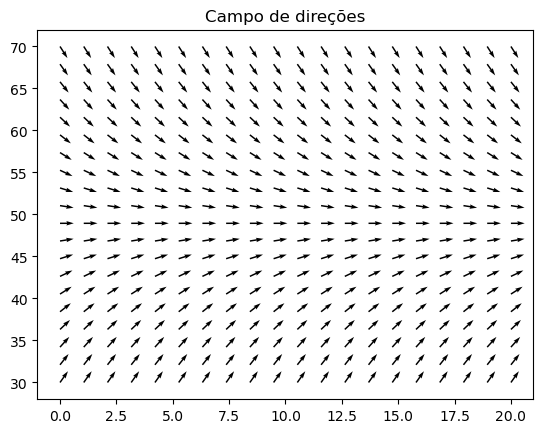

In [2]:
# campo de vetores
t = np.linspace(0,20, 20)
v = np.linspace(30, 70, 20)
tm, vm = np.meshgrid(t, v)
dv = 9.8-vm/5
dt = np.ones(dv.shape)

norm = np.sqrt(dt**2 + dv**2)

# plots
plt.title("Campo de direções")
plt.quiver(tm,vm,dt/norm,dv/norm, angles='xy')

plt.show()


A função constante $v(t) = 49$ é uma solução, pois substituindo $v(t) = 49$ na na equação, as expressões dos dois lados do sinal de igualdade são iguais a zero. Como essa solução não varia com o tempo, $v(t) = 49$ é chamada solução de equilíbrio. 

Observando o campo de direções, podemos chegar a conclusão de que todas as outras soluções (as quais dependem das condições iniciais do problema) parecem estar convergindo para a solução de equilíbrio quando $t$ aumenta. 

**Exemplo 4.2:** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/26%5B%3Bvnd.vst.idref%3Dchapter01%5D!/4/158/17:54%5Brio%2C%20ma%5D))
A solução geral da equação $\frac{dv}{dt}=9,8-\frac{v}{5}$, apresentada no Exemplo 4.1, é dada 
$$v(t)=49+c e^{-t / 5}$$

em que a constante $c$ é arbitrária. Para determinar a constante $c$ precisamos de uma condição inicial, por exemplo $v(0)=0$, que fornece a solução particular $v(t)=49\left(1-e^{-t / 5}\right)$.

Vamos agora plotar as soluções para diversos valores de $c$, juntamente com o campo de direções, a curva vermelha corresponde a solução particular para o caso de $v(0)=0$. 

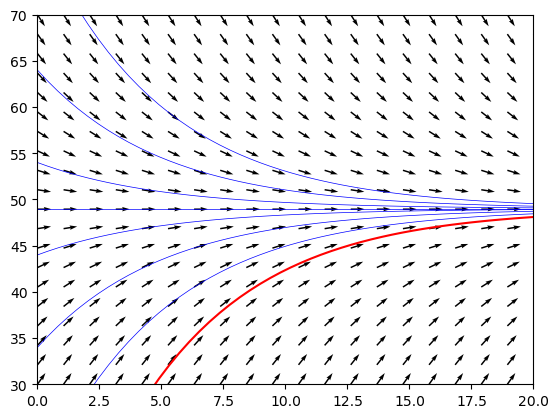

In [3]:
ti = np.linspace(0,20)
vi = lambda t: 49 + c*np.exp(-t/5)

for c in [-30,-15,-5,0,5,15,30]:
    plt.plot(ti, vi(ti), lw=0.5, color='b')

plt.plot(ti, 49*(1-np.exp(-ti/5)), color='r')
plt.quiver(tm,vm,dt/norm,dv/norm, angles='xy')
plt.xlim(0,20)
plt.ylim(30,70)
plt.show()

Para verificar que $v(t)=49+c e^{-t / 5}$ é uma solução da equação $\frac{d v}{d t}=9,8-\frac{v}{5}$ podemos usar o módulo de computação symbólica SymPy como é mostrado a abaixo

In [4]:
import sympy as sp

# definindo os símbolos e a função
t, c = sp.symbols('t, c')
v = 49 + c*sp.exp(-t/5)

In [5]:
#lado esquerdo da equação (obtendo dv/dt)
v.diff(t)

-c*exp(-t/5)/5

In [6]:
#lado direito da equação
9.8-v/5

-c*exp(-t/5)/5

In [7]:
# testando se o lado direito e o lado esquerdo são iguais
v.diff(t)==9.8-v/5

True

**Atividade 4.1:** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/43)) Esboce o campo de direções para a equação diferencial $y^{\prime}=x^2+y^2-1$.

### 4.3. Solução geral e gráficos 

A seguir vamos ver como verificar se uma função é solução de uma EDO usando derivação com SymPy.

**Exemplo 4.3:** A equação diferencial $y' = -x y$ tem solução $ y = c \, e^{\frac{-x^2}{2}}$ com $c$ constante, pois 

$$ y' = c \, e^{\frac{-x^2}{2}}(-x) = -xy$$

ou seja, a função $y(x)$ satisfaz a equação. Vamos confirmar usando `sympy`.

In [8]:
# Define os símbolos e funções
x,c = sp.symbols('x,c')
y = c*sp.exp(-x**2/2)

# verificando se y é solução
sp.Eq(y.diff(x),-x*y)

True

A solução da equação diferencial $\frac{dy}{dx} = -x y$ pode ser obtida de forma relativamente simples reescrevendo a equação como $\frac{1}{y} dy = -x dx$ e integrando os dois lados. Com SymPy podemos fazer como é mostrado a seguir.

In [9]:
x,y,C = sp.symbols('x,y,C')
eq = sp.Eq(sp.integrate(1/y, y), sp.integrate(-x, x))
display (eq)

Eq(log(y), -x**2/2)

Incluindo a constante $c$ e resolvendo para $y$ obtemos

In [10]:
eq = sp.Eq(sp.integrate(1/y, y), sp.integrate(-x, x)+C)
sol = sp.solve(eq,y)
display(sol[0])

exp(C - x**2/2)

que é o mesmo que $ce^{\frac{-x^2}{2}}$ (se fizermos $c = e^C)$.

In [11]:
sol[0].subs(sp.exp(C),c)

c*exp(-x**2/2)

Note que a função $ y(x) = c \, e^{\frac{-x^2}{2}}$ apresenta infinitas soluções da equação diferencial, pois, para cada valor diferente de $c$ temos uma função diferente que também satisfaz a equação, logo também é solução. 

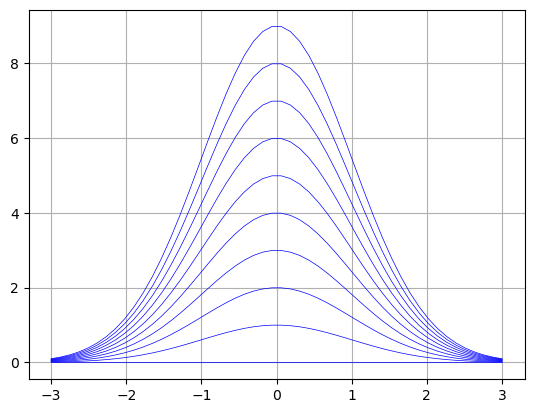

In [12]:
# Definindo a função usando a sintaxe "lambda" 
y = lambda x: np.exp((-x**2)/2) 

# Definindo um intervalo de x para o plot
x = np.linspace(-3,3)

for c in range(10):
    texto = 'c='+str(c)
    plt.plot(x, c*y(x), lw=0.5, color='blue')
    
plt.grid()
plt.show()

No exemplo acima, a solução geral da equação diferencial de primeira ordem foi dada e assim pudemos plotar as diferentes soluções para diferentes valores iniciais. No entanto, a maioria das equações diferenciais não pode ser resolvida explicitamente com funções elementares. Para esses casos sempre podemos aproximar soluções construindo o campo de direções. 

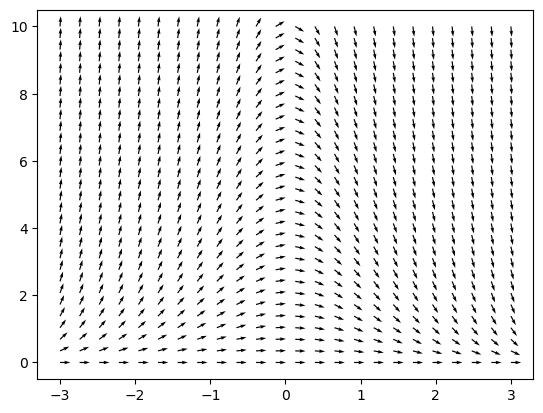

In [13]:
# campo de vetores
x = np.linspace(-3,3, 24)
y = np.linspace(0, 10, 30)
xm, ym = np.meshgrid(x, y)
dy = -xm*ym
dx = np.ones(dy.shape)

norm = np.sqrt(dx**2 + dy**2)

# plots
#plt.title("Campo de direções para $y' + y = \\cos(t)$")
plt.quiver(xm,ym,dx/norm,dy/norm, angles='xy')
#plt.plot(x, 7*np.exp(-x**2/2))

plt.show()

**Atividade 4.2:** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/40)) Mostre que todo membro da família de funções

$$
y=\frac{1+c e^t}{1-c e^t}
$$

é uma solução da equação diferencial $y^{\prime}=\frac{1}{2}\left(y^2-1\right)$. Plote o gráfico para algumas soluções e observe o que acontece quando $t \rightarrow \pm \infty$. Então, determine uma solução que satisfaça a condição inicial $y(0)=2$ e plote junto com as outras soluções.

**Atividade 4.3:**  ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/pageid/41)) Mostre que cada membro da familia de funções $y=(\ln x+$ C) $/ x$ é uma solução da equação diferencial $x^2 y^{\prime}+x y=1$. Então, encontre a solução da equação diferencial que satisfaça a condição inicial $y(1)=2$ e plote juntamente com algumas outras soluções.

A seguir vamos ver alguns exemplos de como obter a solução geral de algumas EDOs por integração simples usando SymPy.

**Exemplo 4.4:** A equação diferencial $\frac{du}{dt} = t + 2$ tem solução obtida facilmente integrando ambos os lados da equação fazendo

$$ \int \frac{du}{dt} dt = \int (t+2)dt $$

$$ u(t) = \frac{t^2}{2}+2t+k$$

em que $k$ é a constante de integração. 

Se impomos uma condição, como por exemplo $u(0)= 8$, obtemos o valor $k=8$, que restringe a solução a uma única curva e não mais à uma família de curvas. Uma equação diferencial com condições iniciais como essa compõem o que chamamos de um *problema de valor inicial* (PVI).

Ou seja, o problema de valor inicial descrito acima pode ser enunciado como

$$ 
\begin{cases} 
\frac {du}{dt}= t+2\\ 
\\
u(0)=8
\end{cases}$$

A seguir, as soluções para diversos valores de $k$ podem ser visualizadas como é mostrado abaixo. A curva em vermelho corresponde à solução para $k=8$.

In [14]:
import sympy as sp
t = sp.symbols('t')

In [15]:
sp.integrate(sp.tan(t),t)

-log(cos(t))

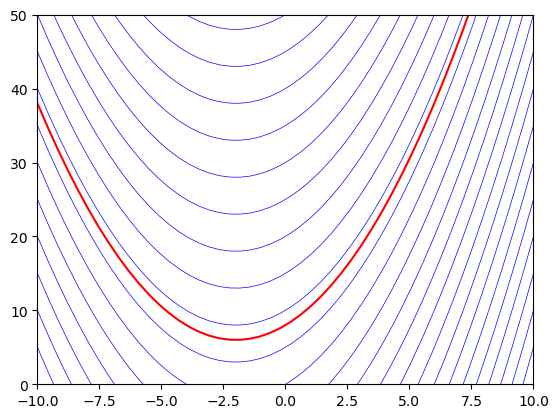

In [16]:
u = lambda t, k: (t**2/2)+2*t+k
t = np.linspace(-10,10)

for k in range(-100,100,5):
    plt.plot(t, u(t,k), color='blue', linewidth=0.5)

plt.plot(t, u(t,8), color='red')
plt.xlim([-10, 10])
plt.ylim([0, 50])
plt.show()

Plotando a solução particular junto com o campo de direções:

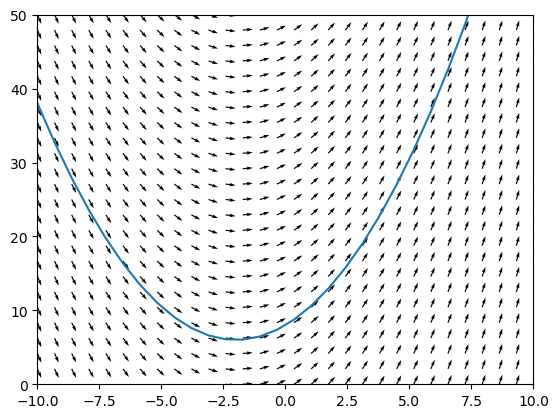

In [17]:
# campo de vetores
t = np.linspace(-10,10, 30)
u = np.linspace(0, 50, 25)
tm, um = np.meshgrid(t, u)
du = tm + 2
dt = np.ones_like(tm) 

norm = np.sqrt(dt**2 + du**2)

# plots
#plt.title("Campo de direções para $y' + y = \\cos(t)$")
plt.quiver(tm,um, dt/norm, du/norm, angles='xy')

plt.plot(t, (t**2/2)+2*t+8)
plt.xlim(-10,10)
plt.ylim(0,50)
plt.show()

**Exemplo 4.5:** Vamos agora resolver $x^2y' = 1 - x^2+y^2 - x^2y^2$ com  $y(1) = 0$ fatorando o lado direito e separando as variáveis.

$$x^2y' = (1 - x^2)(1+y^2)$$

$$\frac{y'}{1+y^2} = \frac{1 - x^2}{x^2} $$

$$\frac{y'}{1+y^2}  = \frac{1}{x^2} - 1 $$

$$\arctan (y)  = \frac{-1}{x} - x + C $$

$$y = \tan \left(\frac{-1}{x} - x + C\right)$$

Aplicando a condição inicial chegamos a 

$$y = \tan \left(\frac{-1}{x} - x + 2 \right)$$

Usando `sympy` para obter as integrais:

In [18]:
x,y = sp.symbols('x,y')

In [19]:
sp.integrate(1/(1+y**2), y)

atan(y)

In [20]:
sp.integrate(1/(x**2) -1, x)

-x - 1/x

**Exercícios**

**1.** ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/124/42)):
Para cada uma das equações, plote o campo de direções, então, descreva o comportamento das soluções para valores grandes de $t$. Em seguida, encontre a solução geral, e use-a para determinar o comportamento das soluções quando $t \rightarrow \infty$. Plote algumas soluções particulares.

$$
\begin{aligned}
& \text{(a)}\quad y^{\prime}+3 y=t+e^{-2 t} \\
& \text{(b)}\quad y^{\prime}-2 y=t^2 e^{2 t} \\
& \text{(c)}\quad y^{\prime}+y=t e^{-t}+1 \\
& \text{(d)}\quad y^{\prime}+\frac{1}{t} y=3 \cos (2 t), \quad t>0 \\
& \text{(e)}\quad y'+xy=x
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(f)}\quad y^{\prime}-2 y=3 e^t \\
& \text{(g)}\quad t y^{\prime}-y=t^2 e^{-t}, \quad t>0 \\
& \text{(h)}\quad y^{\prime}+y=5 \operatorname{sen}(2 t) \\
& \text{(i)}\quad 2 y^{\prime}+y=3 t^2\\
& \text{(j)}\quad y'+3x^2y=sen(x)e^{-x^3}
\end{aligned}
$$




**2.** ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/236/7:117%5BExe%2Cmpl%5D)) Para cada uma das equações encontre a solução geral. Plote algumas soluções particulares.

$$
\begin{aligned}
& \text{(a)}\quad y^{\prime}=\frac{x^2}{y} \\
& \text{(b)}\quad y^{\prime}+y^2 \operatorname{sen} x=0 \\
& \text{(c)}\quad y^{\prime}=\cos ^2(x) \cos ^2(2y) \\ 
& \text{(d)}\quad x y^{\prime}=\left(1-y^2\right)^{1 / 2} 
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(e)}\quad \frac{d y}{d x}=\frac{x-e^{-x}}{y+e^y}\\
& \text{(f)}\quad \frac{d y}{d x}=\frac{x^2}{1+y^2} 
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(g)}\quad \frac{d y}{d x}=\frac{y}{x} \\
& \text{(h)}\frac{d y}{d x}=\frac{-x}{y}
\end{aligned}
$$



**3.** Encontre a solução do problema de valor inicial dado. Plote algumas soluções e a solução particular.

$$
\begin{aligned}
& \text{(a)}\quad y^{\prime}=(1-2 x) y^2, y(0)=-1 / 6 \\
& \text{(b)}\quad y^{\prime}=(1-2 x) / y, y(1)=-2 \\
& \text{(c)}\quad x d x+y e^{-x} d y=0, \quad y(0)=1 \\
& \text{(e)}\quad d r / d \theta=r^2 / \theta, \quad r(1)=2 \\
\end{aligned}
\quad \quad \quad
\begin{aligned}
& \text{(f)}\quad y^{\prime}=x y^3\left(1+x^2\right)^{-1 / 2}, y(0)=1 \\
& \text{(g)}\quad y^{\prime}=2 x /(1+2 y), \quad y(2)=0 \\
& \text{(h)}\quad y^{\prime}=\left(3 x^2-e^x\right) /(2 y-5), \quad y(0)=1 \\
& \text{(i)}\quad \operatorname{sen}(2 x) d x+\cos (3 y) d y=0, \quad y(\pi / 2)=\pi / 3
\end{aligned}
$$




**Referências**

[BOYCE, William E.; DIPRIMA, Richard C.; MEADE, Douglas B](https://integrada.minhabiblioteca.com.br/reader/books/9788521638841/). Equacoes Diferenciais Elementares e Problemas de Valores de Contorno. 12. ed. Rio de Janeiro: LTC, 2024. 

[STEWART, James; CLEGG, Daniel; WATSON, Saleem](https://integrada.minhabiblioteca.com.br/reader/books/9786555584103/). Cálculo v.2. 6. ed. Porto Alegre: +A Educação - Cengage Learning Brasil, 2022. 